In [1]:
from pathlib import Path

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# extracting fr lengths form read.simulatoninfo:
# ❯ tail -n +2 output/read.mappinginfo | cut -f5,6 | sed -E "s/([0-9]+)-[0-9]+\t[0-9]+-([0-9]+)/\2-\1/" | bc > frlengths.txt
frlengths = pd.read_csv("/home/malte/projects/gobi/readSimulator/frlengths.txt", names=["length"])


In [4]:
frlengths.head()

,length
0,280
1,199
2,200
3,154
4,110


/tmp/ipykernel_4051047/2333876945.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(frlengths["length"], kde=True, bins=np.unique(frlengths["length"]), edgecolor="black", palette='viridis')
/home/malte/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


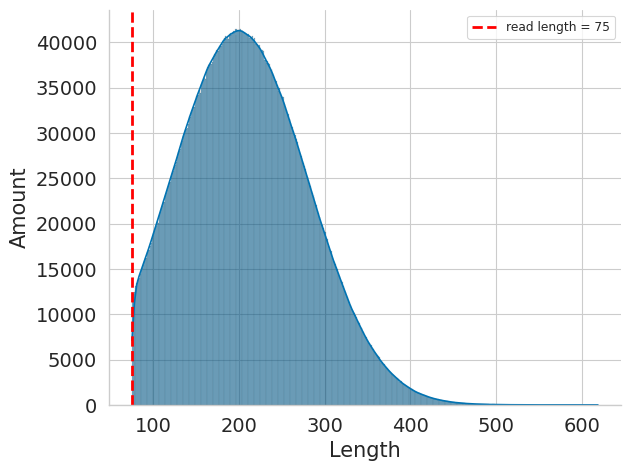

In [73]:

sns.set_style("whitegrid")
sns.set_palette("colorblind")

ax = sns.histplot(frlengths["length"], kde=True, bins=np.unique(frlengths["length"]), edgecolor="black", palette='viridis')

ax.axvline(x=75, color='red', linestyle='--', linewidth=2, label='read length = 75')

ax.set_title("")
ax.set_xlabel("Length", fontsize=15)
ax.set_ylabel("Amount", fontsize=15)

ax.tick_params(axis="both", which="major", labelsize=14)

ax.legend()

plt.tight_layout()

sns.despine()

plt.savefig("/home/malte/projects/gobi/readSimulator/report/plots/fr_dist.jpg", dpi=300, bbox_inches="tight")

plt.show()

In [5]:
df_summary = pd.read_csv("~/projects/gobi/readSimulator/output/read.mappinginfo", sep="\t")



/tmp/ipykernel_17907/3284541967.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_summary = pd.read_csv("~/projects/gobi/readSimulator/output/read.mappinginfo", sep="\t")


In [3]:
df_summary

,readid,chr,gene,transcript,t_fw_regvec,t_rw_regvec,fw_regvec,rw_regvec,fw_mut,rw_mut
0,0,9,ENSG00000241978,ENST00000495980,245-320,294-369,112918686-112918761,112918735-112918778|112930679-112930711,NaN,NaN
1,1,9,ENSG00000241978,ENST00000495980,283-358,409-484,112918724-112918778|112930679-112930700,112930751-112930826,NaN,"33,62"
2,2,9,ENSG00000241978,ENST00000495980,39-114,109-184,112811017-112811092,112811087-112811136|112918599-112918625,NaN,1
3,3,9,ENSG00000241978,ENST00000495980,10-85,268-343,112810988-112811063,112918709-112918778|112930679-112930685,22,17
4,4,9,ENSG00000241978,ENST00000495980,59-134,167-242,112811037-112811112,112918608-112918683,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7777495,7777495,19,ENSG00000104870,ENST00000221466,598-673,632-707,50017178-50017253,50017212-50017287,NaN,6
7777496,7777496,19,ENSG00000104870,ENST00000221466,281-356,568-643,50015817-50015892,50017148-50017223,NaN,"11,53"
7777497,7777497,19,ENSG00000104870,ENST00000221466,941-1016,1113-1188,50017598-50017673,50027790-50027865,23,NaN
7777498,7777498,19,ENSG00000104870,ENST00000221466,761-836,967-1042,50017341-50017391|50017468-50017493,50017624-50017699,NaN,44


In [4]:
# Set the Seaborn style and palette
fw_mut_list = df_summary["fw_mut"]
rw_mut_list = df_summary["rw_mut"]

mutations = []
mut_lengths = {}
mut_lengths[0] = 0
for elem in fw_mut_list:
    elem = str(elem)
    for comp in elem.split(","):
        if comp != 'nan':
            mutations.append(int(comp)+1)

for elem in rw_mut_list:
	elem = str(elem)
	for comp in elem.split(","):
		if comp != 'nan':
			mutations.append(int(comp)+1)

NameError: name 'df_summary' is not defined

In [8]:
df_summary['fw_num_mut'] = df_summary['fw_mut'].apply(lambda x: 0 if pd.isna(x) else len(str(x).split(',')))

df_summary['rw_num_mut'] = df_summary['rw_mut'].apply(lambda x: 0 if pd.isna(x) else len(str(x).split(',')))

In [11]:
df_summary.head()

,readid,chr,gene,transcript,t_fw_regvec,t_rw_regvec,fw_regvec,rw_regvec,fw_mut,rw_mut,fw_num_mut,rw_num_mut
0,0,9,ENSG00000241978,ENST00000495980,245-320,294-369,112918686-112918761,112918735-112918778|112930679-112930711,NaN,NaN,0,0
1,1,9,ENSG00000241978,ENST00000495980,283-358,409-484,112918724-112918778|112930679-112930700,112930751-112930826,NaN,"33,62",0,2
2,2,9,ENSG00000241978,ENST00000495980,39-114,109-184,112811017-112811092,112811087-112811136|112918599-112918625,NaN,1,0,1
3,3,9,ENSG00000241978,ENST00000495980,10-85,268-343,112810988-112811063,112918709-112918778|112930679-112930685,22,17,1,1
4,4,9,ENSG00000241978,ENST00000495980,59-134,167-242,112811037-112811112,112918608-112918683,NaN,NaN,0,0


In [ ]:
mutations[1:40]

[3,
 48,
 47,
 70,
 62,
 13,
 48,
 58,
 5,
 6,
 2,
 21,
 70,
 19,
 20,
 71,
 2,
 18,
 75,
 47,
 24,
 60,
 61,
 15,
 7,
 18,
 25,
 70,
 16,
 27,
 20,
 54,
 66,
 49,
 74,
 12,
 55,
 67,
 19]

/tmp/ipykernel_14638/1359398932.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(mutations, kde=True, bins=75, edgecolor="black", palette='viridis')


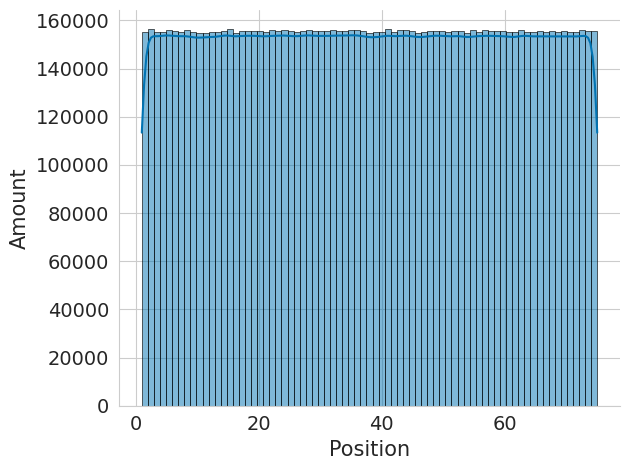

In [4]:

sns.set_style("whitegrid")
sns.set_palette("colorblind")


ax = sns.histplot(mutations, kde=True, bins=75, edgecolor="black")

ax.set_title("")
ax.set_xlabel("Position", fontsize=15)
ax.set_ylabel("Amount", fontsize=15)

ax.tick_params(axis="both", which="major", labelsize=14)

plt.tight_layout()

sns.despine()

plt.savefig("/home/malte/projects/gobi/readSimulator/report/plots/mut_dist.jpg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [ ]:
np.unique(mutations)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

In [67]:
print(mut_lengths)

df_mut_lengths = pd.DataFrame(list(mut_lengths.items()), columns=['Category', 'Value'])
df_mut_lengths.head()

{0: 7318447, 1: 5545979, 2: 4145666, 3: 1528380, 6: 9060, 4: 372940, 5: 66865, 7: 1057, 8: 96}


,Category,Value
0,0,7318447
1,1,5545979
2,2,4145666
3,3,1528380
4,6,9060


/tmp/ipykernel_15651/3913937911.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_mut_lengths, x="Category", y="Value" , edgecolor="black", palette='viridis')


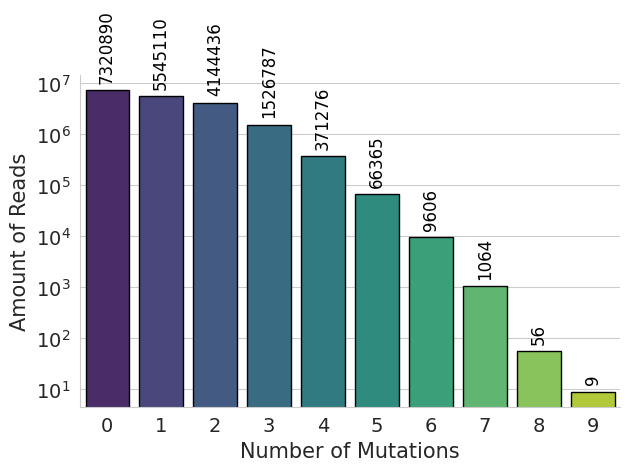

In [9]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")

df_mut_lengths = pd.DataFrame(list(mut_lengths.items()), columns=['Category', 'Value'])


ax = sns.barplot(data=df_mut_lengths, x="Category", y="Value" , edgecolor="black", palette='viridis')

ax.set_title("")
ax.set_xlabel("Number of Mutations", fontsize=15)
ax.set_ylabel("Amount of Reads", fontsize=15)
for container in ax.containers:
    ax.bar_label(container , fmt="%.0f", label_type='edge', fontsize=12, color="black", rotation=90, padding = 5)
ax.tick_params(axis="both", which="major", labelsize=14)
plt.yscale('log')

plt.tight_layout()
sns.despine()

plt.savefig("/home/malte/projects/gobi/readSimulator/report/plots/mut_amount.jpg", dpi=300, bbox_inches="tight")

plt.show()

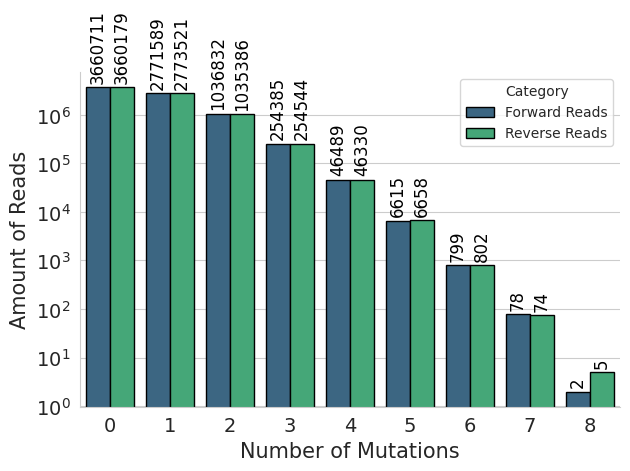

In [21]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Assuming 'df' contains 'fw_num_mut' and 'rw_num_mut'
# Group by mutation counts and count the occurrences
fw_counts = df_summary['fw_num_mut'].value_counts().sort_index()
rw_counts = df_summary['rw_num_mut'].value_counts().sort_index()

# Combine the results into a single DataFrame for plotting
mutation_counts = pd.DataFrame({
    'Number of Mutations': fw_counts.index,
    'Forward Reads': fw_counts.values,
    'Reverse Reads': rw_counts.reindex(fw_counts.index, fill_value=0).values  # Align indexes, fill missing with 0
})

# Melt the DataFrame for Seaborn compatibility
plot_data = mutation_counts.melt(id_vars='Number of Mutations',
                                 value_vars=['Forward Reads', 'Reverse Reads'],
                                 var_name='Category',
                                 value_name='Amount of Reads')

# Create the plot
sns.set_style("whitegrid")
sns.set_palette("colorblind")

ax = sns.barplot(
    data=plot_data,
    x='Number of Mutations',
    y='Amount of Reads',
    hue='Category',
    edgecolor="black",
    palette='viridis'
)

# Add annotations to each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type='edge', fontsize=12, color="black", rotation=90, padding=3)

# Set axis labels, title, and log scale for y-axis
ax.set_xlabel("Number of Mutations", fontsize=15)
ax.set_ylabel("Amount of Reads", fontsize=15)
ax.set_yscale('log')  # Log scale
ax.tick_params(axis="both", which="major", labelsize=14)

# Adjust layout and save the figure
plt.tight_layout()
sns.despine()
plt.savefig("/home/malte/projects/gobi/readSimulator/report/plots/mut_amount.jpg", dpi=300, bbox_inches="tight")
plt.show()


/tmp/ipykernel_17907/2457002459.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


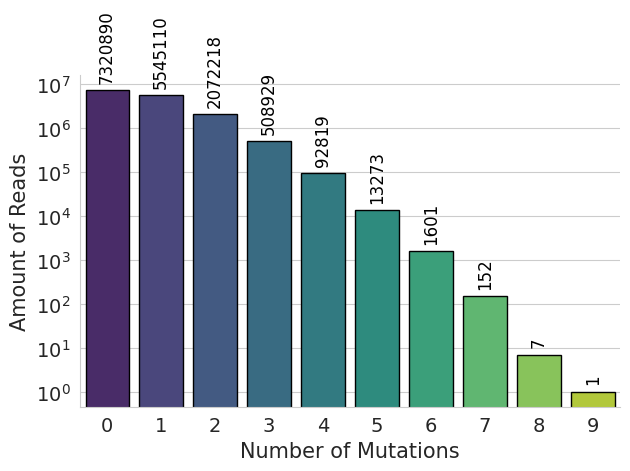

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the counts of fw_num_mut and rw_num_mut
combined_counts = df_summary[['fw_num_mut', 'rw_num_mut']].fillna(0).astype(int).apply(pd.Series.value_counts).sum(axis=1).sort_index()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Number of Mutations': combined_counts.index,
    'Amount of Reads': combined_counts.values
})

# Plot
sns.set_style("whitegrid")
sns.set_palette("colorblind")

ax = sns.barplot(
    data=plot_data,
    x='Number of Mutations',
    y='Amount of Reads',
    edgecolor="black",
    palette='viridis'
)

# Annotate the bars with their values
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type='edge', fontsize=12, color="black", rotation=90, padding=5)

# Set axis labels, title, and log scale
ax.set_xlabel("Number of Mutations", fontsize=15)
ax.set_ylabel("Amount of Reads", fontsize=15)
ax.set_yscale('log')  # Log scale for better visualization
ax.tick_params(axis="both", which="major", labelsize=14)

# Final adjustments
plt.tight_layout()
sns.despine()
plt.savefig("/home/malte/projects/gobi/readSimulator/report/plots/mut_amount.jpg", dpi=300, bbox_inches="tight")
plt.show()


In [20]:
list(combined_counts.values)

[np.float64(7320890.0),
 np.float64(5545110.0),
 np.float64(2072218.0),
 np.float64(508929.0),
 np.float64(92819.0),
 np.float64(13273.0),
 np.float64(1601.0),
 np.float64(152.0),
 np.float64(7.0),
 np.float64(1.0)]

<>:6: SyntaxWarning: invalid escape sequence '\|'
<>:7: SyntaxWarning: invalid escape sequence '\|'
<>:11: SyntaxWarning: invalid escape sequence '\|'
<>:12: SyntaxWarning: invalid escape sequence '\|'
<>:17: SyntaxWarning: invalid escape sequence '\|'
<>:18: SyntaxWarning: invalid escape sequence '\|'
<>:22: SyntaxWarning: invalid escape sequence '\|'
<>:23: SyntaxWarning: invalid escape sequence '\|'
<>:6: SyntaxWarning: invalid escape sequence '\|'
<>:7: SyntaxWarning: invalid escape sequence '\|'
<>:11: SyntaxWarning: invalid escape sequence '\|'
<>:12: SyntaxWarning: invalid escape sequence '\|'
<>:17: SyntaxWarning: invalid escape sequence '\|'
<>:18: SyntaxWarning: invalid escape sequence '\|'
<>:22: SyntaxWarning: invalid escape sequence '\|'
<>:23: SyntaxWarning: invalid escape sequence '\|'
/tmp/ipykernel_28849/2917982617.py:6: SyntaxWarning: invalid escape sequence '\|'
  non_split_reads = df[~df['fw_regvec'].str.contains('\|', na=False) &
/tmp/ipykernel_28849/2917982617.py:

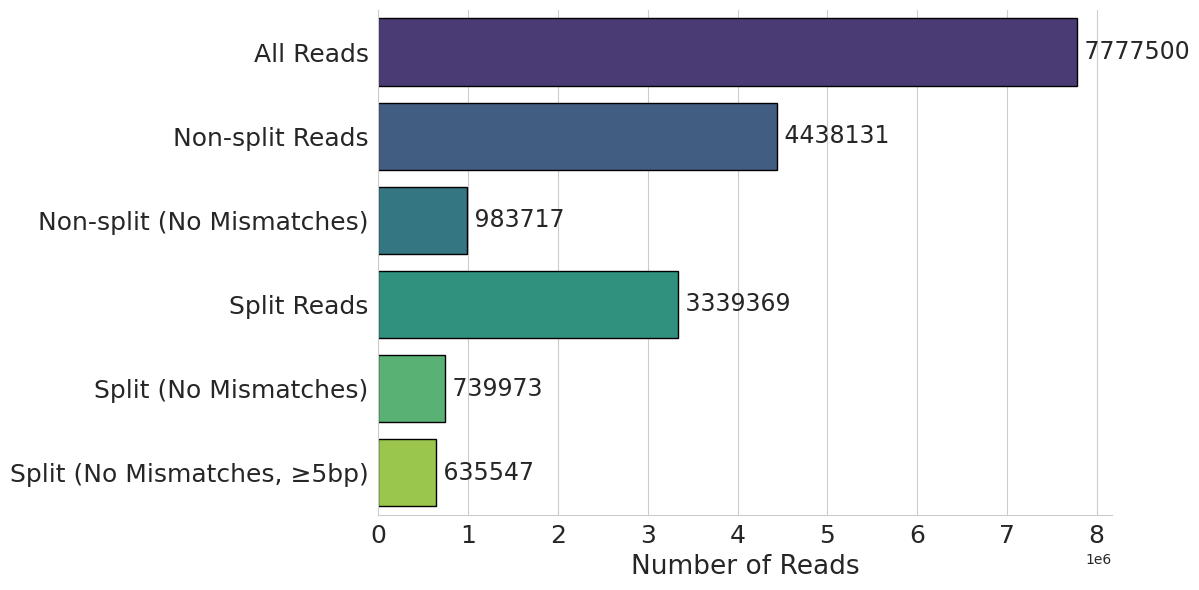

In [8]:
df = df_summary
total_reads = len(df)

non_split_reads = df[~df['fw_regvec'].str.contains('\|', na=False) & 
                    ~df['rw_regvec'].str.contains('\|', na=False)].shape[0]

non_split_no_mismatch = df[
    (~df['fw_regvec'].str.contains('\|', na=False) & 
        ~df['rw_regvec'].str.contains('\|', na=False)) &
    (df['fw_mut'].isna() & df['rw_mut'].isna())
].shape[0]

split_reads = df[df['fw_regvec'].str.contains('\|', na=False) | 
                df['rw_regvec'].str.contains('\|', na=False)].shape[0]

split_no_mismatch = df[
    (df['fw_regvec'].str.contains('\|', na=False) | 
        df['rw_regvec'].str.contains('\|', na=False)) &
    (df['fw_mut'].isna() & df['rw_mut'].isna())
]

count = 0
fw_regions = list(split_no_mismatch['fw_regvec'])
rw_regions = list(split_no_mismatch['rw_regvec'])
for i in range(len(fw_regions)):
    curr_fw = str(fw_regions[i])
    curr_rw = str(rw_regions[i])
    r = True
    f = True

    for fvec in curr_fw.split("|"):
        coords = fvec.split("-")
        if (int(coords[1])-int(coords[0]) < 5):
            f=False
            
    
    for rvec in curr_rw.split("|"):
        coords = rvec.split("-")
        if (int(coords[1])-int(coords[0]) < 5):
            r=False
    
    if (r and f):
        count+=1

split_no_mismatch_5bp = count

split_no_mismatch = split_no_mismatch.shape[0]

categories = [
    'All Reads',
    'Non-split Reads',
    'Non-split (No Mismatches)',
    'Split Reads',
    'Split (No Mismatches)',
    'Split (No Mismatches, ≥5bp)'
]

counts = [
    total_reads,
    non_split_reads,
    non_split_no_mismatch,
    split_reads,
    split_no_mismatch,
    split_no_mismatch_5bp
]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=counts, y=categories, palette='viridis', edgecolor='black')

ax.set_xlabel("Number of Reads", fontsize=19)

ax.tick_params(axis="both", which="major", labelsize=18)


for i, v in enumerate(counts):
    plt.text(v, i, f' {v}', va='center', fontsize=17)

plt.tight_layout()
sns.despine()
plt.savefig("/home/malte/projects/gobi/readSimulator/report/plots/bar.jpg", dpi=300, bbox_inches="tight")




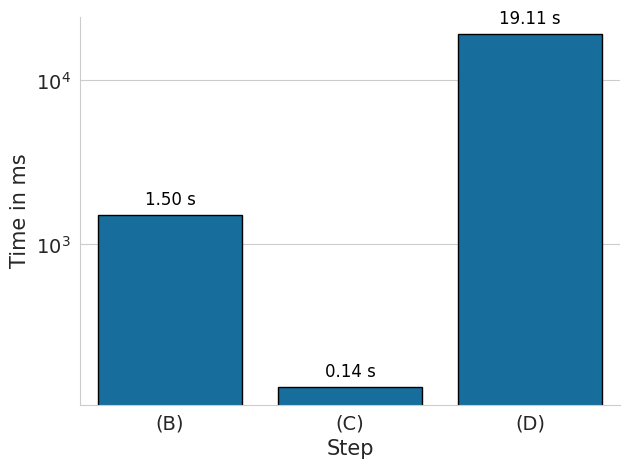

In [2]:
times = {
    "Step": ["(B)", "(C)", "(D)"],
    "Milliseconds": [1502, 135, 19108],
    "Version": ["M", "M", "M"],
}

sns.set_style("whitegrid")
sns.set_palette("colorblind")
df = pd.DataFrame(times)

ax = sns.barplot(data=df, x="Step", y="Milliseconds" , edgecolor="black")

ax.set_title("")
ax.set_xlabel("Step", fontsize=15)
ax.set_ylabel("Time in ms", fontsize=15)

ax.tick_params(axis="both", which="major", labelsize=14)
plt.yscale('log')

for index, row in df.iterrows():
    seconds = row['Milliseconds'] / 1000  
    ax.text(
        index,                           
        row['Milliseconds'] * 1.1,     
        f"{seconds:.2f} s",           
        ha='center',                 
        va='bottom',                
        fontsize=12,               
        color='black'             
    )

plt.tight_layout()

sns.despine()

plt.savefig("/home/malte/projects/gobi/readSimulator/report/plots/times.jpg", dpi=300, bbox_inches="tight")

plt.show()


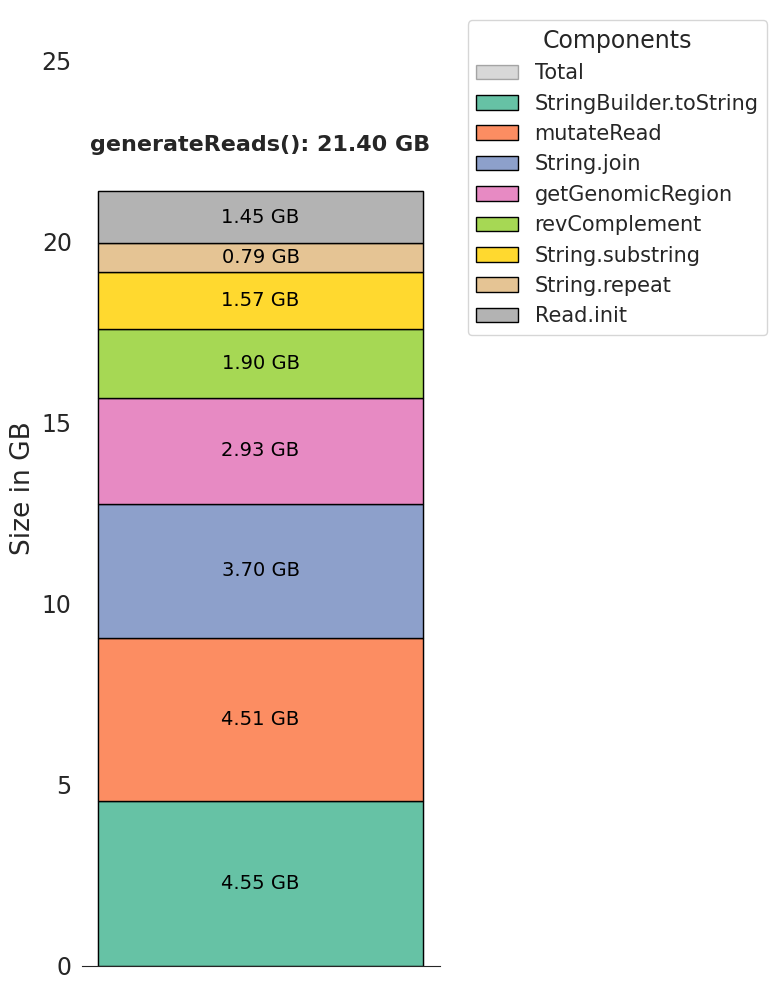

In [5]:
sns.set_style("white")
sns.set_palette("deep")

data = {
    "Component": [
        "StringBuilder.toString", 
        "mutateRead", 
        "String.join", 
        "getGenomicRegion", 
        "revComplement", 
        "String.substring", 
        "String.repeat", 
        "Read.init"
    ],
    "GB": [4.55, 4.51, 3.7, 2.93, 1.9, 1.57, 0.79, 1.45],
}

total_gb = 21.4

df = pd.DataFrame(data)

df['Cumulative'] = df['GB'].cumsum()

fig, ax = plt.subplots(figsize=(8, 10))

ax.bar(
    x=["Total"],
    height=[total_gb],
    color="gray",
    alpha=0.3,
    edgecolor="black",
    label="Total",
)

bottom = 0
colors = sns.color_palette("Set2", len(df))
for i, row in df.iterrows():
    ax.bar(
        x=["Total"],
        height=[row['GB']],
        bottom=bottom,
        color=colors[i],
        edgecolor="black",
        label=row['Component'],
    )
    bottom += row['GB']

bottom = 0
for i, row in df.iterrows():
    ax.text(
        x=0,
        y=bottom + row['GB'] / 2,  
        s=f"{row['GB']:.2f} GB", 
        ha='center',
        va='center',
        color='black', 
        fontsize=14,
    )
    bottom += row['GB']

ax.text(
    x=0, 
    y=total_gb + 1, 
    s=f"generateReads(): {total_gb:.2f} GB", 
    ha='center',
    va='bottom',
    fontsize=16,
    fontweight="bold",
)

ax.set_ylim(0, total_gb + 5)
ax.set_xticks([])
ax.set_ylabel("Size in GB", fontsize=19)
ax.set_title("", fontsize=18, fontweight="bold")
ax.tick_params(axis='y', labelsize=17)

ax.legend(title="Components", title_fontsize=17, fontsize=15, bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
sns.despine(left=True)

plt.tight_layout()
plt.savefig("/home/malte/projects/gobi/readSimulator/report/plots/generateReads_ma.jpg", dpi=300, bbox_inches="tight")


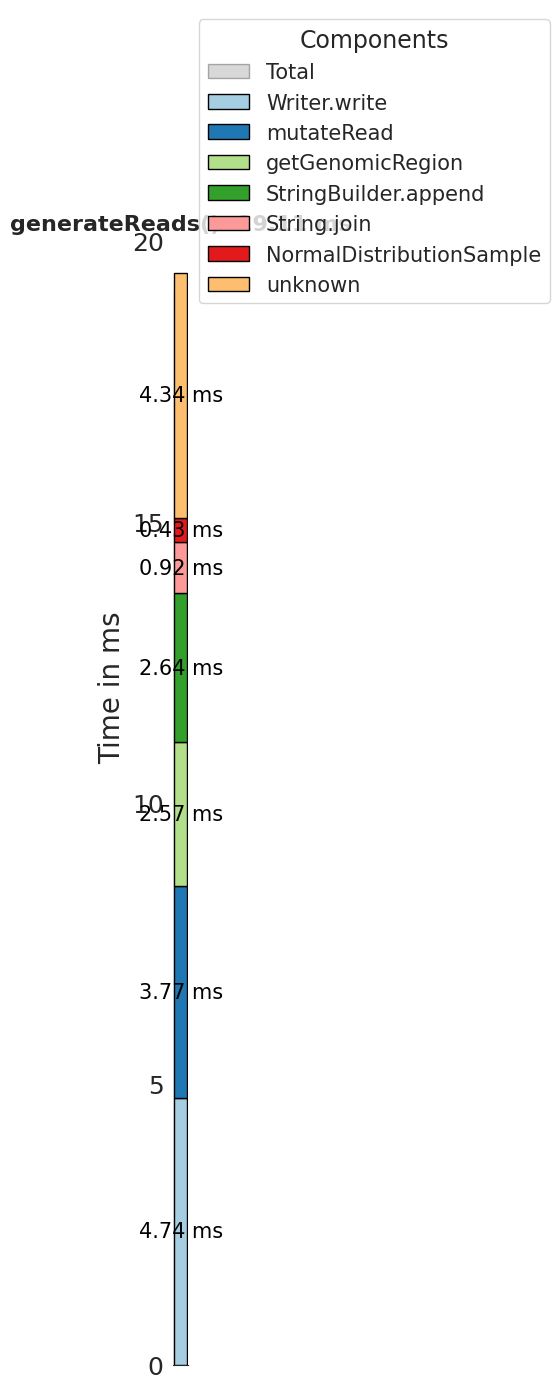

In [6]:
sns.set_style("white")
sns.set_palette("deep")

data = {
   "Component": ["Writer.write", 
                 "mutateRead", 
                 "getGenomicRegion", 
                 "StringBuilder.append", 
                 "String.join", 
                 "NormalDistributionSample", 
                 "unknown"], 
    "ms": [4.739,3.766,2.570,2.640,0.920,0.430,4.343],
}


total_ms = 19.11

df = pd.DataFrame(data)

df['Cumulative'] = df['ms'].cumsum()

fig, ax = plt.subplots(figsize=(5, 14))

ax.bar(
    x=["Total"],
    height=[total_ms],
    color="gray",
    alpha=0.3,
    edgecolor="black",
    label="Total",
)

bottom = 0
colors = sns.color_palette("Paired", len(df))
for i, row in df.iterrows():
    ax.bar(
        x=["Total"],
        height=[row['ms']],
        bottom=bottom,
        color=colors[i],
        edgecolor="black",
        label=row['Component'],
    )
    bottom += row['ms']

bottom = 0
for i, row in df.iterrows():
    ax.text(
        x=0,
        y=bottom + row['ms'] / 2,
        s=f"{row['ms']:.2f} ms",
        ha='center',
        va='center',
        color='black',
        fontsize=15,
    )
    bottom += row['ms']

ax.text(
    x=0,
    y=total_ms + 1,
    s=f"generateReads(): {total_ms:.2f} ms",
    ha='center',
    va='bottom',
    fontsize=16,
    fontweight="bold",
)

ax.set_ylim(0, total_ms + 5)
ax.set_xticks([])
ax.set_ylabel("Time in ms", fontsize=20)
ax.set_title("", fontsize=18, fontweight="bold")
ax.tick_params(axis='y', labelsize=18)

ax.legend(title="Components", title_fontsize=17, fontsize=15, bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(left=True)

plt.savefig("/home/malte/projects/gobi/readSimulator/report/plots/generateReads_times.jpg", dpi=300, bbox_inches="tight")
plt.tight_layout()
